In [ ]:

process = RMC.simulate.OU(5,96,10000,24,[1],[5],[1])
total_cost = np.zeros(10000)
cur_I = np.ones(10000) *0.3

for i in range(96):
    cur_X = process.sim_trajectories[:,i]
    GP_inp = np.column_stack((cur_X,cur_I))
    B = hybrid_solution.policy_maps[i].predict(GP_inp)[0].flatten()
    pos_Bs = np.where(B>0)
    upper_bound = np.maximum(cur_X[pos_Bs]-5,0)
    B[pos_Bs] =  np.minimum(B[pos_Bs] ,upper_bound)
    LB = np.maximum(hybrid_solution.Bmin,hybrid_solution.charging_eff*(hybrid_solution.Ilb- cur_I)/hybrid_solution.dt)
    UB = np.minimum(hybrid_solution.Bmax,(hybrid_solution.Iub-cur_I)/(hybrid_solution.charging_eff*hybrid_solution.dt))
    B = np.maximum(LB,np.minimum(B,UB))
    cur_I = cur_I + B * ( (B>0) * hybrid_solution.charging_eff + (B<0) *1/hybrid_solution.charging_eff) * hybrid_solution.dt
    total_cost = total_cost+ (cur_X- B-5)**2 * process.dt 

In [ ]:
np.mean(total_cost+final_cost.cost(cur_I))

In [1]:
import numpy as np
import RMC
from scipy.interpolate import make_interp_spline
t = np.arange(0,24+0.25,0.25)
forecast_24hr = np.loadtxt('2018-07-21')
x = np.linspace(0,24,24)
spl = make_interp_spline(x, forecast_24hr,k=3)

# This is forecast taken as mean-reversion leve                                                                                             l
mean_rev_levels = spl(t)[:-1]
X0 =np.random.normal(mean_rev_levels[0], np.sqrt(mean_rev_levels[0]/10),size=10000)
process = RMC.simulate.CIR(X0,96,10000,24,[5],mean_rev_levels,[1])
running_cost = RMC.costfunctions.L2()
final_cost = RMC.costfunctions.final_SOCcontraint(0.10,50)
parameters = (10,30,0.95,0.05)
batch_size = 50
value_kernel= None
normalize_v = True
policy_kernel = None
normalize_policy = True
hybrid_solution = RMC.model.HybridControl(600,process,running_cost,final_cost,parameters,batch_size,\
                                          value_kernel,normalize_v,policy_kernel,normalize_policy)


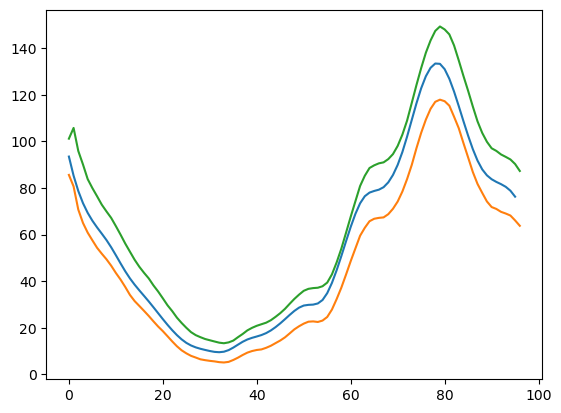

In [2]:
import matplotlib.pyplot as plt



plt.plot(hybrid_solution.targets)

plt.plot(hybrid_solution.X_lowers)

plt.plot(hybrid_solution.X_uppers)

In [3]:
hybrid_solution.targets = np.loadtxt('AmazonMonthlyTargets/2018-07-21')[:-1]

In [4]:
hybrid_solution.solve()

Policy GP MSE: 4.25254602315944e-11
Value GP MSE: 0.37861385308969053
Timestep: 23.75
__________________________________________________
Policy GP MSE: 1.5581057023932401e-10
Value GP MSE: 0.09247298710094133
Timestep: 23.5
__________________________________________________
Policy GP MSE: 3.846894020354907e-12
Value GP MSE: 0.1346887547703317
Timestep: 23.25
__________________________________________________
Policy GP MSE: 8.233396301503498e-10
Value GP MSE: 0.06078973056649655
Timestep: 23.0
__________________________________________________
Policy GP MSE: 6.225057750793302e-10
Value GP MSE: 0.07715998660389589
Timestep: 22.75
__________________________________________________
Policy GP MSE: 4.938960621451501e-10
Value GP MSE: 0.09858973763759274
Timestep: 22.5
__________________________________________________
Policy GP MSE: 1.159497569052769e-09
Value GP MSE: 0.056136759829127324
Timestep: 22.25
__________________________________________________
Policy GP MSE: 1.7795349421898275e-09

In [5]:

process =  RMC.simulate.CIR(mean_rev_levels[0],96,10000,24,[5],mean_rev_levels,[1])
total_cost = np.zeros(10000)
cur_I = np.ones(10000) *3

for i in range(96):
    cur_X = process.sim_trajectories[:,i]
    GP_inp = np.column_stack((cur_X,cur_I))
    B = hybrid_solution.policy_maps[i].predict(GP_inp)[0].flatten()
    pos_Bs = np.where(B>0)
    upper_bound = np.maximum(cur_X[pos_Bs]-hybrid_solution.targets[i],0)
    B[pos_Bs] =  np.minimum(B[pos_Bs] ,upper_bound)
    LB = np.maximum(hybrid_solution.Bmin,hybrid_solution.charging_eff*(hybrid_solution.Ilb- cur_I)/hybrid_solution.dt)
    UB = np.minimum(hybrid_solution.Bmax,(hybrid_solution.Iub-cur_I)/(hybrid_solution.charging_eff*hybrid_solution.dt))
    B = np.maximum(LB,np.minimum(B,UB))
    cur_I = cur_I + B * ( (B>0) * hybrid_solution.charging_eff + (B<0) *1/hybrid_solution.charging_eff) * hybrid_solution.dt
    total_cost = total_cost+ hybrid_solution.running_cost.cost(B,cur_X,hybrid_solution.targets[i])* process.dt 

In [7]:
np.mean(total_cost+hybrid_solution.final_cost.cost(cur_I),axis =0)

16.979430111443186

In [8]:

process =  RMC.simulate.CIR(mean_rev_levels[0],96,10000,24,[5],mean_rev_levels,[1])
total_cost = np.zeros(10000)
cur_I = np.ones(10000) *3

for i in range(96):
    cur_X = process.sim_trajectories[:,i]
    B= cur_X-hybrid_solution.targets[i]
    LB = np.maximum(hybrid_solution.Bmin,hybrid_solution.charging_eff*(hybrid_solution.Ilb- cur_I)/hybrid_solution.dt)
    UB = np.minimum(hybrid_solution.Bmax,(hybrid_solution.Iub-cur_I)/(hybrid_solution.charging_eff*hybrid_solution.dt))
    B = np.maximum(LB,np.minimum(B,UB))
    cur_I = cur_I + B * ( (B>0) * hybrid_solution.charging_eff + (B<0) *1/hybrid_solution.charging_eff) * hybrid_solution.dt
    total_cost = total_cost+ hybrid_solution.running_cost.cost(B,cur_X,hybrid_solution.targets[i])* process.dt 

In [9]:
np.mean(total_cost+hybrid_solution.final_cost.cost(cur_I),axis =0)

43.441676992141296